In [1]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
import pandas as pd
init_gpu.initialize_gpus()

locations = ['LOC1', 'LOC2']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# get train-test set
train_df, test_df, train_web_sam1ples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

2024-11-19 11:26:30.569916: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-19 11:26:30.577260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731975990.585851 3821868 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731975990.588400 3821868 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 11:26:30.597473: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  2
Loading Dataset...
Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 

/home/asil0892/doh_traffic_analysis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,...,116,117,118,119,120,121,122,123,124,125
0,LOC1,0,-1.086861,0.690199,0.647933,0.201517,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
1,LOC1,1005,1.095547,-1.585943,0.647933,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
2,LOC1,1005,1.095547,0.780047,-1.972790,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
3,LOC1,1005,-1.086861,0.690199,0.647933,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
4,LOC1,1005,1.095547,0.780047,0.183501,-0.828965,-2.083179,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604


In [46]:
from scripts.train_conditional_vae import ConditionalVAE
from scripts.train_vae import Sampling
cond_vae_model = tf.keras.models.load_model("../models/vae/conditional_vae/checkpoints/LOC1-LOC2-e55-mse1-kl0.01.keras", custom_objects={'ConditionalVAE': ConditionalVAE, 'Sampling': Sampling})

/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


# Out of distribution generation: Input - Location 2 data, with Location 2 Condition

In [47]:
import tensorflow as tf
from scripts.train_conditional_vae import filter_and_sort_data, get_web_embeddings
import numpy as np

web_model = tf.keras.models.load_model(
    "../models/website/LOC1-LOC2-baseGRU-epochs100-train_samples1200-triplet_samples5-domain_invariant-l1.keras")

one_hot_encoded_loc = {'LOC1': np.array([0.0, 1.0]).astype(
    'float32'), 'LOC2': np.array([1.0, 0.0]).astype('float32')}

# location 1 web embeddings with location 2 label as the condition
# let's use the actual LOC1 traces as the sample for now. we should be able to sample randomly

x_LOC1 = filter_and_sort_data(
    test_df, 'LOC1').to_numpy().astype(np.float32)

x_LOC1_web_embedding = get_web_embeddings(
    x_LOC1, web_model)

x_LOC2 = filter_and_sort_data(
    test_df, 'LOC2'
).to_numpy().astype(np.float32)
x_LOC2_web_embedding = get_web_embeddings(
    x_LOC2, web_model)

LOC1_domain_labels = np.tile(one_hot_encoded_loc['LOC1'], (len(x_LOC1), 1))
LOC2_domain_labels = np.tile(one_hot_encoded_loc['LOC2'], (len(x_LOC2), 1))
y_LOC1 = np.hstack((x_LOC1_web_embedding, LOC1_domain_labels))
y_LOC2 = np.hstack((x_LOC2_web_embedding, LOC2_domain_labels))

In [48]:
def get_reconstructions(x, y, vae_model):
    embeddings = []
    chunk_size = 200
    for i in range(0, len(x), chunk_size):
        chunk_x, chunk_y = x[i:i+chunk_size], y[i:i+chunk_size]
        transformed_chunk, _, _ = vae_model((chunk_x, chunk_y))
        embeddings.append(transformed_chunk)

    return np.vstack(embeddings)

target_location = 'LOC2'
reconstructed = get_reconstructions(x_LOC2, y_LOC2, cond_vae_model)
x_LOC2 = filter_and_sort_data(test_df, 'LOC2').to_numpy()

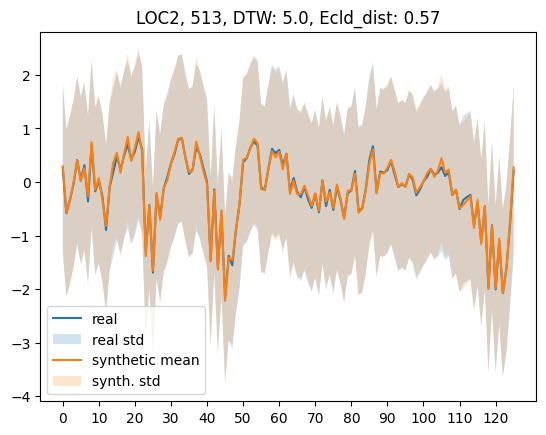

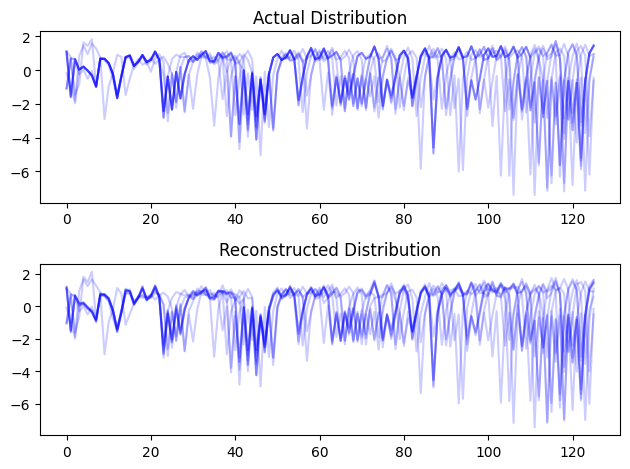

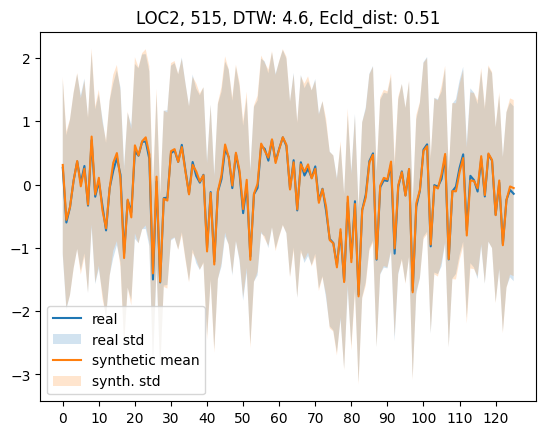

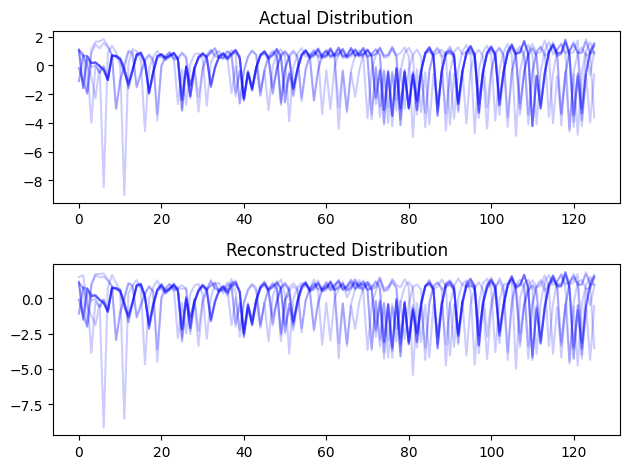

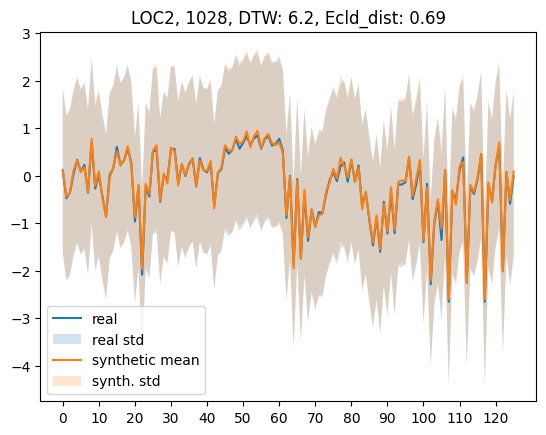

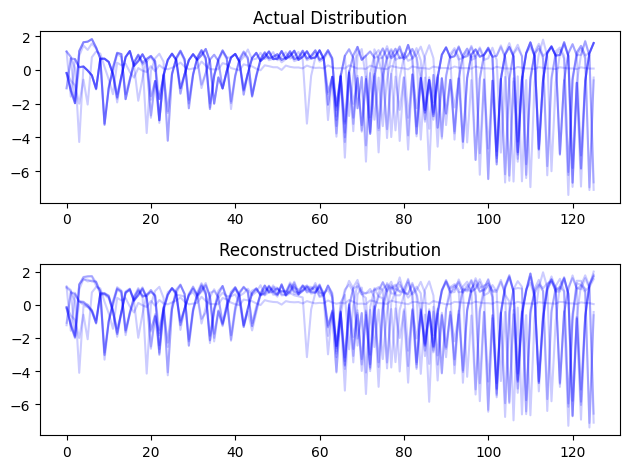

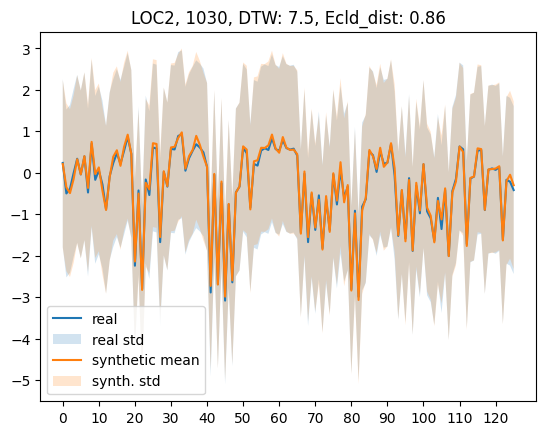

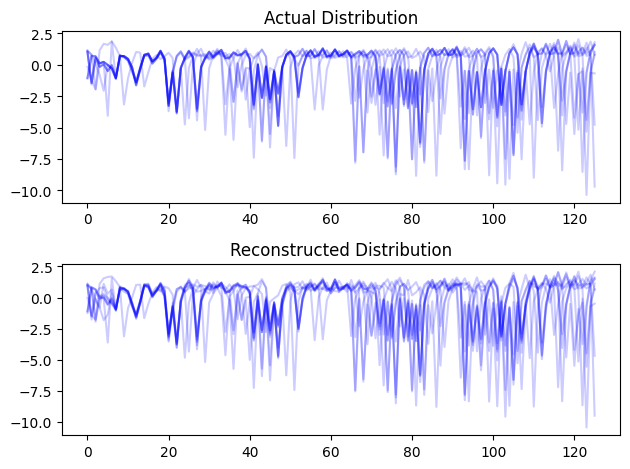

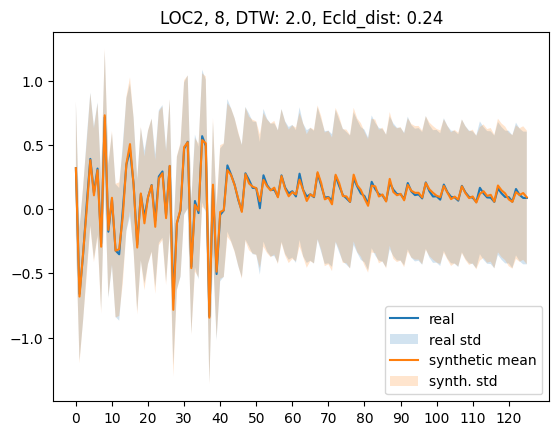

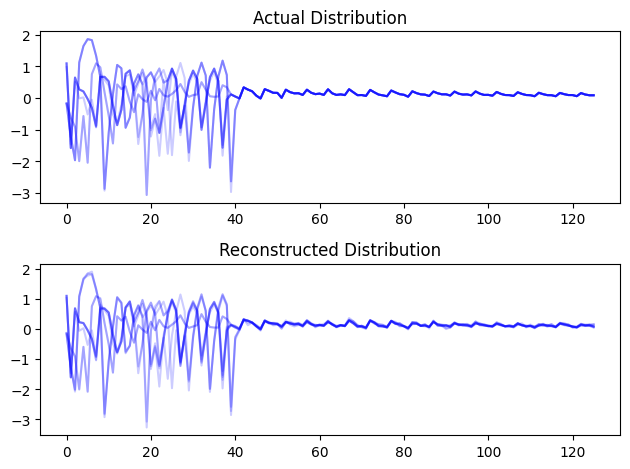

2.871865460590498


In [49]:
import matplotlib.pyplot as plt
import numpy as np
from fastdtw import fastdtw

import numpy as np
def get_euclidean_distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

samples_per_website = 200

x_test = x_LOC2
eucld_dists = []
for i in range(0, 5 * samples_per_website, samples_per_website):
    plt.figure()
    # real mean
    real_mean = np.mean(x_test[i:i+samples_per_website], axis=0)
    real_std = np.std(x_test[i:i+samples_per_website])
    
    plt.plot(real_mean, label='real')
    plt.fill_between(range(length),real_mean + real_std, real_mean - real_std, label='real std', alpha = 0.2)
    
    # synth mean
    synthetic_mean = np.mean(reconstructed[i:i+samples_per_website], axis=0)
    synthetic_std = np.std(reconstructed[i:i+samples_per_website])
    
    dtw_distance, path = fastdtw(real_mean, synthetic_mean, dist=get_euclidean_distance)
    euclidean_distance = get_euclidean_distance(real_mean, synthetic_mean)

    plt.plot(synthetic_mean, label='synthetic mean')
    plt.fill_between(range(length), synthetic_mean + synthetic_std, synthetic_mean - synthetic_std, label='synth. std', alpha = 0.2)
    
    
    plt.xticks(range(0,length, 10), labels=range(0, length, 10))
    plt.title(f"{target_location}, {test_web_samples[i // samples_per_website]}, DTW: {dtw_distance:.2}, Ecld_dist: {euclidean_distance:.2}")
    plt.legend()
    plt.show()
    plt.close()

    plt.figure()
    plt.subplot(2, 1, 1)
    for j in range(10):
        plt.plot(x_test[i + j], alpha = 0.2, c = 'b')
    plt.title("Actual Distribution")
    
    plt.subplot(2, 1, 2)
    for j in range(10):
        plt.plot(reconstructed[i + j], alpha = 0.2, c = 'b')
    plt.title("Reconstructed Distribution")
    plt.tight_layout()
    plt.show()
    plt.close()
        
    
    eucld_dists.append(euclidean_distance)
    

print(sum(eucld_dists))

# Latent Space Visualization

In [50]:
def get_latent_z(x, y, vae_model):
    x = tf.convert_to_tensor(x, dtype=tf.float32)
    y = tf.convert_to_tensor(y, dtype=tf.float32)
    z_mean, z_log_var, z = vae_model.encode(x, y)
    
    return z

/tmp/ipykernel_3821868/4241213650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.sort_values(by=['Location','Website'], inplace=True)


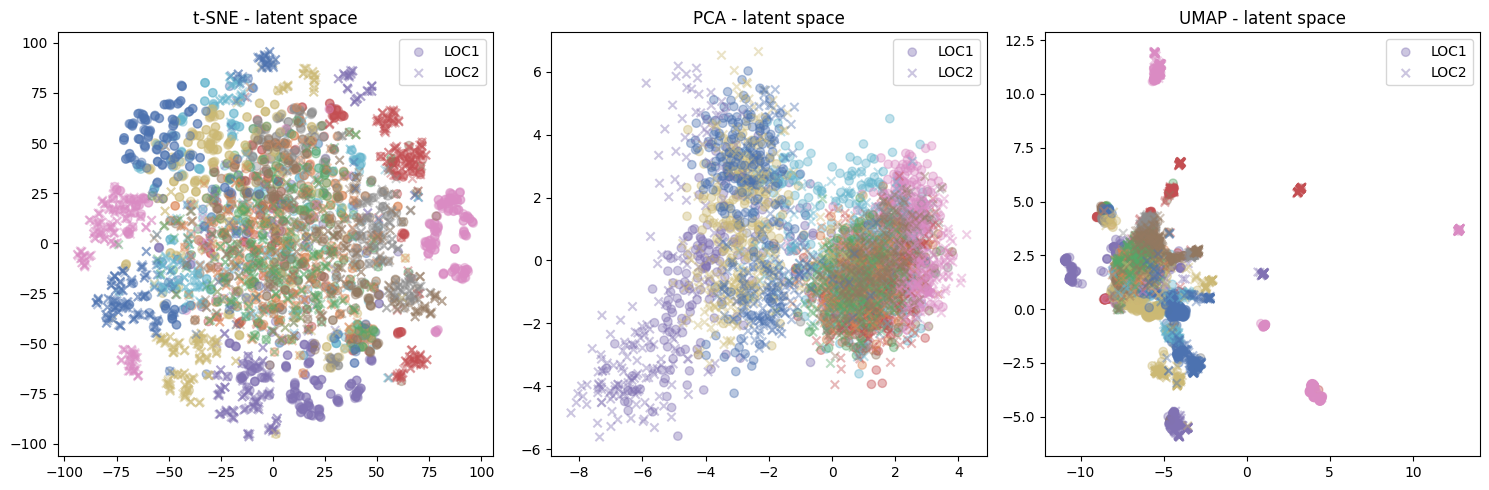

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

random.seed()
test_df.sort_values(by=['Location','Website'], inplace=True)
pca_web_samples = random.sample(test_web_samples, 10)
# pca_web_samples = [8, 513, 575]
pca_df = test_df[test_df['Website'].isin(pca_web_samples)]
reducers = {'t-SNE': TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3), 'PCA': PCA(n_components=2), 'UMAP': umap.UMAP()}

pca_LOC1_data = pca_df[pca_df['Location'] == 'LOC1'].iloc[:, 2:]
pca_LOC1_web_embeddings = get_web_embeddings(pca_LOC1_data, web_model)
pca_LOC1_domain_labels = np.tile(one_hot_encoded_loc['LOC1'], (len(pca_LOC1_data), 1))
pca_LOC1_condition = np.hstack((pca_LOC1_web_embeddings, pca_LOC1_domain_labels))
pca_LOC1_latent = get_latent_z(pca_LOC1_data, pca_LOC1_condition, cond_vae_model)

pca_LOC2_data = pca_df[pca_df['Location'] == 'LOC2'].iloc[:, 2:]
pca_LOC2_web_embeddings = get_web_embeddings(pca_LOC2_data, web_model)
pca_LOC2_domain_labels = np.tile(one_hot_encoded_loc['LOC2'], (len(pca_LOC2_data), 1))
pca_LOC2_condition = np.hstack((pca_LOC2_web_embeddings, pca_LOC2_domain_labels))
pca_LOC2_latent = get_latent_z(pca_LOC2_data, pca_LOC2_condition, cond_vae_model)


pca_both_latent = np.vstack((pca_LOC1_latent.numpy(), pca_LOC2_latent.numpy()))


def plt_scatter_location(embedding, pca_df, pca_web_samples, location:str, mark:str):
    mask = pca_df['Location'] == location
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette("deep", n_colors=len(pca_web_samples))[x] for x in pca_df[mask].Website.map({pca_web_samples[i]:i for i in range(len(pca_web_samples))})],
        alpha=0.4,
        label = location,
        marker=mark
        
    )

plt.figure(figsize=(15, 5))
i = 1
for reducer_name, reducer in reducers.items():
    embedding = reducer.fit_transform(pca_both_latent)
    plt.subplot(1, len(reducers), i)
    plt_scatter_location(embedding[:len(pca_LOC1_data)], pca_df, pca_web_samples, 'LOC1', 'o')
    plt_scatter_location(embedding[len(pca_LOC1_data):], pca_df, pca_web_samples, 'LOC2', 'x')
    i += 1
    plt.legend()
    plt.tight_layout()
    plt.title(f"{reducer_name} - latent space")
plt.show()

# Select a website and try to synthesize, without giving the input

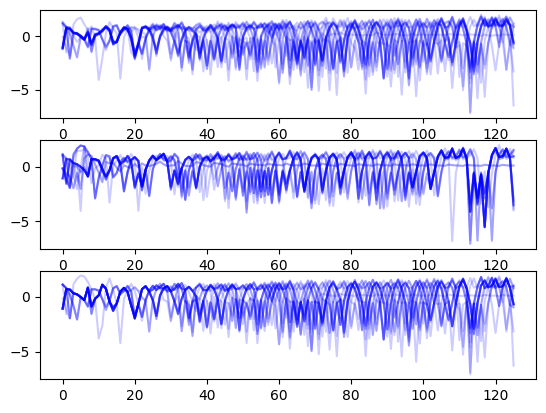

In [60]:
selected_website = 513
source_location = 'LOC1'


# get the respective web embeddings from location 1
selected_source_data = test_df[(test_df['Website'] == selected_website) & (test_df['Location'] == source_location)].iloc[:, 2:].to_numpy().astype(np.float32)
selected_web_embeddings = get_web_embeddings(selected_source_data, web_model)
target_domain_labels = np.tile(one_hot_encoded_loc['LOC2'], (len(selected_source_data), 1))

selected_target_data = test_df[(test_df['Website'] == selected_website) & (test_df['Location'] == target_location)].iloc[:, 2:].to_numpy().astype(np.float32)

condition = np.hstack((selected_web_embeddings, target_domain_labels))

z = get_latent_z(selected_source_data, condition, cond_vae_model)

# do manipulations

reconstructed = cond_vae_model.decode(z, condition)


plt.figure()
plt.subplot(3, 1, 1)

for i in range(20):
    plt.plot(reconstructed[i], alpha=0.2, c='b')
    
plt.subplot(3,1,2)
for i in range(20):
    plt.plot(selected_target_data[i], alpha=0.2, c='b')

plt.subplot(3,1,3)
for i in range(20):
    plt.plot(selected_source_data[i], alpha=0.2, c='b')
plt.show()

plt.tight_layout()
plt.close()
